In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pandas as pd

base_url = "https://www.nytimes.com/news-event/israel-hamas-gaza?page="

# Create empty lists to store data
news_names = []
news_contents = []

for page_number in range(1, 16):
    url = f"{base_url}{page_number}"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p', class_='css-1pga48a e15t083i1')

        print(f"Processing page {page_number}")

        for paragraph in paragraphs:
            news_name = "NY Times"
            news_names.append(news_name)

            paragraph_text = paragraph.get_text(strip=True)
            news_contents.append(paragraph_text)

            time.sleep(1)  # Sleep for 1 second between requests
    else:
        print(f"Failed to fetch the page {page_number}. Status code: {response.status_code}")

# Create a data frame
df1 = pd.DataFrame({'News': news_names, 'Content': news_contents})
# Display the data frame
print(df1)

Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
Processing page 10
Processing page 11
Processing page 12
Processing page 13
Processing page 14
Processing page 15
         News                                            Content
0    NY Times  Before the war, Road to Recovery helped bring ...
1    NY Times                Israel raided a West Bank hospital.
2    NY Times  David Cameron, the foreign secretary, said tha...
3    NY Times  The nation is at the center of the current tur...
4    NY Times       Plus, the Biden campaign wants Taylor Swift.
..        ...                                                ...
595  NY Times  Job seekers are filling recruitment centers in...
596  NY Times  The U.S. and some other donor countries said t...
597  NY Times  Donors have pulled funds for the main aid agen...
598  NY Times  Days of torrential rains have exacerbated the ...
599  NY T

In [ ]:
base_url = "https://www.telegraph.co.uk/israel-hamas-war/page-"

# Create empty lists to store data
news_channel = []
news_contents = []

for page_number in range(1, 20):
    url = base_url + str(page_number) + "/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        paragraphs = soup.find_all('p', class_='e-standfirst e-standfirst--card')

        print(f"Processing page {page_number}")

        for paragraph in paragraphs:
            news_channel.append("Telegraph")
            paragraph_text = paragraph.get_text(strip=True)
            news_contents.append(paragraph_text)

            time.sleep(1)
    else:
        print(f"Failed to retrieve the webpage for page {page_number}.")

# Create a data frame
df2 = pd.DataFrame({'News': news_channel, 'Content': news_contents})

# Display the data frame
print(df2)

Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
Processing page 10
Processing page 11
Processing page 12
Processing page 13
Processing page 14
Processing page 15
Processing page 16
Processing page 17
Processing page 18
Processing page 19
          News                                            Content
0    Telegraph  Move comes after country’s army chief warns th...
1    Telegraph  Israeli soldiers are losing limbs and sustaini...
2    Telegraph  Sanctions, imposed in coordination with USs, a...
3    Telegraph  A London art installation gives a sense of wha...
4    Telegraph  There's nothing moral about South Africa's gra...
..         ...                                                ...
534  Telegraph  Hamas says it freed Roni Krivoi, who holds dua...
535  Telegraph  Sussex force ‘recognise potential for increase...
536  Telegraph  Bezalel Smotrich accused of spending r

In [ ]:
base_url = "https://edition.cnn.com/middleeast/live-news/israel-hamas-war-gaza-news-"
start_date = datetime(2023, 12, 31)
end_date = datetime(2024, 1, 31)
current_date = start_date

# Create empty lists to store data
news_list = []
content_list = []

while current_date <= end_date:
    formatted_date = current_date.strftime("%m-%d-%y")
    url = f"{base_url}{formatted_date}/index.html"

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('div', class_='sc-dnqmqq render-stellar-contentstyles__List-sc-9v7nwy-1 eUPcFX')

        news_list.append("CNN")
        content = []

        for paragraph in paragraphs:
            paragraph_text = paragraph.get_text(strip=True)
            content.append(paragraph_text)
            time.sleep(1)  # Sleep for 1 second between requests

        content_list.append("\n".join(content))
        current_date += timedelta(days=1)  # Move to the next day
    elif response.status_code == 404:
        print(f"Page not found for {formatted_date}. Skipping...")
        current_date += timedelta(days=1)  # Move to the next day
    else:
        print(f"Failed to fetch the page for {formatted_date}. Status code: {response.status_code}")
        break  # Exit the loop if there is an issue with fetching a page

# Create a DataFrame
df3 = pd.DataFrame({'News': news_list, 'Content': content_list})

# Display the DataFrame
print(df3)

Page not found for 01-24-24. Skipping...
   News                                            Content
0   CNN  The US Navy says itsank three Houthi boatsafte...
1   CNN  Israel's military announced it would begin tow...
2   CNN  Hamas said one of its senior leaders, Saleh Al...
3   CNN  AUS official told CNNthat Israel carried out t...
4   CNN  Israel's military isintensifying its operation...
5   CNN  Arguments within Israel's wartime government h...
6   CNN  Scores of people werekilled or wounded in Isra...
7   CNN                                                   
8   CNN  US Secretary of State Antony Blinken has arriv...
9   CNN  US Secretary of StateAntony Blinken made clear...
10  CNN  The UN Security Councilapproved a resolution W...
11  CNN  The US and UK military launchedstrikes against...
12  CNN  Iranian-backedHouthi militantswarned theywould...
13  CNN                                                   
14  CNN                                                   
15  CNN  Israel

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd


# Set up Selenium WebDriver (make sure to replace the path with your WebDriver executable)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

# Open the URL
url = 'https://www.nbcnews.com/Israel-Hamas-war-Gaza-Strip-conflict'
driver.get(url)

# Wait for the page to load (you might need to adjust the waiting time)
time.sleep(5)

# Find and collect the content from the first <div>
element = driver.find_element(By.CLASS_NAME, 'wide-tease-item__description')
content = element.text

# Initialize lists to store data
news_channel = []
news_contents = []

# Append data from the initial page
news_channel.append("NBC News")
news_contents.append(content)

# Click on the "Load More" button 5 times
for _ in range(5):
    try:
        load_more_button = driver.find_element(By.CLASS_NAME, 'animated-ghost-button')
        load_more_button.click()
        time.sleep(5)  # Wait for the new content to load (adjust if needed)

        # Extract content from the updated page
        updated_html = driver.page_source
        soup = BeautifulSoup(updated_html, 'html.parser')
        updated_content = soup.find_all('div', class_='wide-tease-item__description')

        # Append data from the updated page
        for item in updated_content:
            news_channel.append("NBC News")
            news_contents.append(item.text)
    except Exception as e:
        print(f"Error clicking 'Load More': {e}")
        break

# Create a data frame
df4 = pd.DataFrame({'News': news_channel, 'Content': news_contents})

# Display the data frame
print(df4)

# Close the WebDriver
driver.quit()


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [665 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,685 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')  # Run Chrome in headless mode if you don't want a visible browser window
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create a WebDriver instance with Chrome options
driver = webdriver.Chrome(options=chrome_options)

# Open the URL
url = 'https://www.washingtonpost.com/israel-hamas-war/'
driver.get(url)

# Click on the "Load more" button six times
for _ in range(6):
    try:
        load_more_button = driver.find_element(By.CLASS_NAME, 'pointer')  # Adjust the class name if needed
        load_more_button.click()
        time.sleep(5)  # Wait for the new content to load (adjust if needed)
    except Exception as e:
        print(f"Error clicking 'Load More': {e}")
        break

# Get the updated page source after clicking "Load more"
updated_html = driver.page_source

# Use Beautiful Soup to parse the updated HTML
soup = BeautifulSoup(updated_html, 'html.parser')

# Extract data and store it in lists
news_channel = []
news_contents = []

# Extract and print the content from the updated page
content_elements = soup.find_all('p', class_='pt-xs pb-xs font-size-blurb lh-fronts-tiny font-light gray-dark dn db-ns')
for element in content_elements:
    news_channel.append("Washington Post")
    content = element.get_text(strip=True)
    news_contents.append(content)

# Create a data frame
df5 = pd.DataFrame({'News': news_channel, 'Content': news_contents})

# Display the data frame
print(df5)

# Close the WebDriver
driver.quit()

Error clicking 'Load More': Message: element click intercepted: Element <svg class="content-box fill-white absolute right-0 top-0 mr-xs mt-xs pointer z-3" width="16" height="16" viewBox="0 0 16 16" xmlns="http://www.w3.org/2000/svg" aria-hidden="true" focusable="false" role="img">...</svg> is not clickable at point (769, 16). Other element would receive the click: <a href="https://www.washingtonpost.com/subscribe/signin/?next_url=https%3A%2F%2Fwww.washingtonpost.com%2Fisrael-hamas-war%2F&amp;nid=top_pb_signin&amp;arcId=&amp;itid=nav_sign_in" data-qa="sc-account-button" data-testid="sc-account-login-link" aria-label="..." class="wpds-c-kSOqLF wpds-c-hwuMTf wpds-c-kSOqLF-bywHgD-variant-primary wpds-c-kSOqLF-biynoz-density-compact wpds-c-kSOqLF-hZSyid-isOutline-true wpds-c-kSOqLF-ejCoEP-icon-left wpds-c-kSOqLF-futxca-cv wpds-c-hwuMTf-jmRHnr-variant-primary wpds-c-hwuMTf-obFYN-isOutline-true">Sign in</a>
  (Session info: chrome-headless-shell=121.0.6167.85)
Stacktrace:
#0 0x595835ecbd93 <u

In [ ]:
Final_Content= pd.concat([df1, df2,df3,df4,df5], axis=0)

print(Final_Content)

               News                                            Content
0          NY Times  Before the war, Road to Recovery helped bring ...
1          NY Times                Israel raided a West Bank hospital.
2          NY Times  David Cameron, the foreign secretary, said tha...
3          NY Times  The nation is at the center of the current tur...
4          NY Times       Plus, the Biden campaign wants Taylor Swift.
..              ...                                                ...
18  Washington Post  The Islamic Resistance in Iraq and other pro-I...
19  Washington Post  With American blood now spilled, deterrence is...
20  Washington Post  A drone attack killed three U.S. service membe...
21  Washington Post  A permanent cease-fire appeared imminent. Then...
22  Washington Post  Several Western nations followed the United St...

[1549 rows x 2 columns]


In [ ]:
Final_Content

,News,Content
0,NY Times,"Before the war, Road to Recovery helped bring ..."
1,NY Times,Israel raided a West Bank hospital.
2,NY Times,"David Cameron, the foreign secretary, said tha..."
3,NY Times,The nation is at the center of the current tur...
4,NY Times,"Plus, the Biden campaign wants Taylor Swift."
...,...,...
18,Washington Post,The Islamic Resistance in Iraq and other pro-I...
19,Washington Post,"With American blood now spilled, deterrence is..."
20,Washington Post,A drone attack killed three U.S. service membe...
21,Washington Post,A permanent cease-fire appeared imminent. Then...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def process_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Final_Content['Processed_Content'] = Final_Content['Content'].apply(process_text)

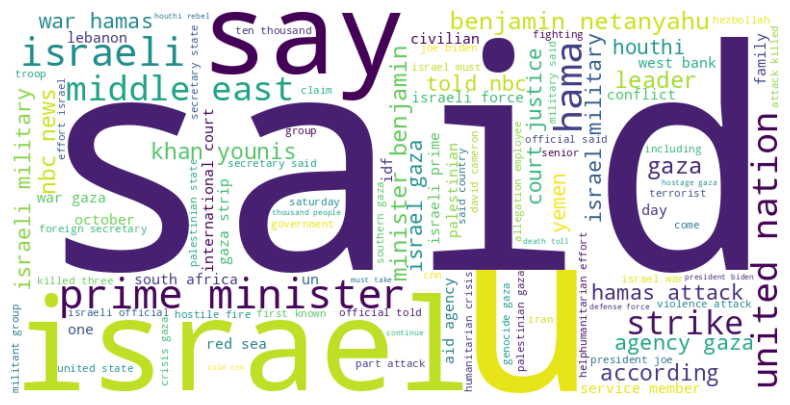

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all processed tokens into a single list
all_tokens = [token for tokens in Final_Content['Processed_Content'] for token in tokens]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def process_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords, including 'say' and 'said'
    stop_words = set(stopwords.words('english'))
    stop_words.update(['say', 'said','u'])
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Example usage
text = "He said that I should say hello."
processed_tokens = process_text(text)
print(processed_tokens)


['hello']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Final_Content['Processed_Content'] = Final_Content['Content'].apply(process_text)

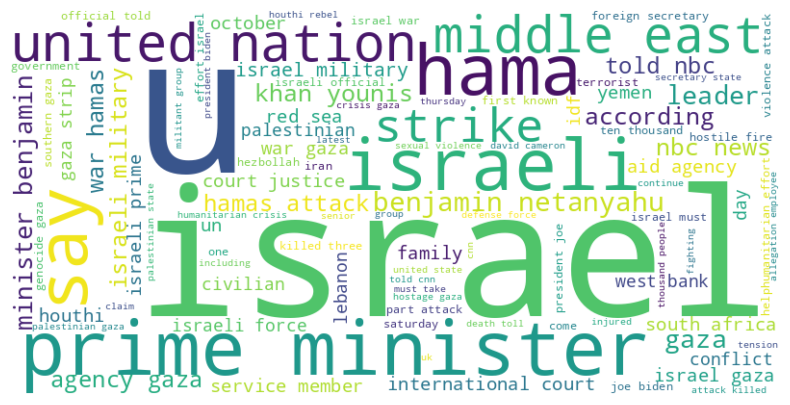

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all processed tokens into a single list
all_tokens = [token for tokens in Final_Content['Processed_Content'] for token in tokens]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Final_Content['Content_Length'] = Final_Content['Processed_Content'].apply(len)
average_length = Final_Content.groupby('News')['Content_Length'].mean()
print(average_length)


News
CNN                213.935484
NBC News            14.988764
NY Times            13.516667
Telegraph           10.985158
Washington Post     14.826087
Name: Content_Length, dtype: float64


In [ ]:
from textblob import TextBlob

Final_Content['Sentiment'] =Final_Content['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)
average_sentiment =Final_Content.groupby('News')['Sentiment'].mean()
print(average_sentiment)

News
CNN                0.019660
NBC News           0.022790
NY Times           0.020496
Telegraph          0.008226
Washington Post   -0.012399
Name: Sentiment, dtype: float64


In [ ]:
from collections import Counter

# Assuming you have already processed the text and added 'Processed_Heading' column

# Create a Counter for each news channel
counters = {}
for channel in Final_Content['News'].unique():
    channel_data = Final_Content[Final_Content['News'] == channel]
    all_tokens_channel = [token for tokens in channel_data['Processed_Content'] for token in tokens]
    counters[channel] = Counter(all_tokens_channel)

# Get the top ten words for each news channel
top_ten_words = {}
for channel, counter in counters.items():
    top_ten_words[channel] = counter.most_common(10)

# Print the results
for channel, words in top_ten_words.items():
    print(f"Top 10 words for {channel}: {words}")

Top 10 words for NY Times: [('israel', 241), ('gaza', 167), ('attack', 158), ('israeli', 104), ('war', 96), ('agency', 77), ('hamas', 76), ('palestinian', 76), ('military', 69), ('court', 69)]
Top 10 words for Telegraph: [('israel', 71), ('say', 51), ('hamas', 48), ('gaza', 48), ('group', 45), ('attack', 44), ('u', 36), ('war', 33), ('israeli', 33), ('minister', 30)]
Top 10 words for CNN: [('gaza', 176), ('israel', 168), ('u', 111), ('israeli', 102), ('attack', 70), ('hamas', 64), ('military', 59), ('palestinian', 58), ('war', 57), ('official', 54)]
Top 10 words for NBC News: [('israel', 83), ('israeli', 72), ('gaza', 67), ('hamas', 63), ('war', 54), ('attack', 46), ('minister', 45), ('news', 44), ('palestinian', 44), ('nbc', 42)]
Top 10 words for Washington Post: [('attack', 8), ('israel', 8), ('palestinian', 6), ('israeli', 5), ('militant', 4), ('official', 4), ('gaza', 4), ('biden', 4), ('hamas', 4), ('iraq', 4)]


In [ ]:
from collections import Counter

# Assuming you have already processed the text and added 'Processed_Heading' column

# Create a Counter for each news channel
counters = {}
for channel in Final_Content['News'].unique():
    channel_data = Final_Content[Final_Content['News'] == channel]
    all_tokens_channel = [token for tokens in channel_data['Processed_Content'] for token in tokens]
    counters[channel] = Counter(all_tokens_channel)

# Get the top ten words for each news channel
top_ten_words = {}
for channel, counter in counters.items():
    top_ten_words[channel] = counter.most_common(3)

# Print the results
for channel, words in top_ten_words.items():
    print(f"Top 3 words for {channel}: {words}")

Top 3 words for NY Times: [('israel', 241), ('gaza', 167), ('attack', 158)]
Top 3 words for Telegraph: [('israel', 71), ('say', 51), ('hamas', 48)]
Top 3 words for CNN: [('gaza', 176), ('israel', 168), ('u', 111)]
Top 3 words for NBC News: [('israel', 83), ('israeli', 72), ('gaza', 67)]
Top 3 words for Washington Post: [('attack', 8), ('israel', 8), ('palestinian', 6)]


In [ ]:
from collections import Counter
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

Final_Content['Processed_Content'] = Final_Content['Content'].apply(preprocess_text)

# Flatten the list of tokenized words
all_words = [word for sublist in Final_Content['Processed_Content'].tolist() for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top ten words
top_ten_words = word_counts.most_common(10)

# Display the top ten words
print("Top Ten Words Used in Headings:")
for word, count in top_ten_words:
    print(f"{word}: {count}")

Top Ten Words Used in Headings:
israel: 571
gaza: 462
said: 342
attack: 326
israeli: 316
hamas: 255
war: 243
palestinian: 202
military: 183
u: 151


In [ ]:
pip install gensim

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora

tokenized_Content = Final_Content['Processed_Content'].tolist()

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_Content)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_Content]


In [ ]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)


In [ ]:
# Print the topics and associated keywords
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx + 1}: {topic}')


Topic 1: 0.020*"attack" + 0.016*"israel" + 0.011*"hamas" + 0.010*"war" + 0.009*"killed" + 0.009*"said" + 0.009*"three" + 0.007*"foreign" + 0.007*"death" + 0.007*"service"
Topic 2: 0.024*"gaza" + 0.023*"israel" + 0.012*"war" + 0.011*"said" + 0.010*"israeli" + 0.008*"people" + 0.008*"palestinian" + 0.008*"attack" + 0.008*"court" + 0.007*"hamas"
Topic 3: 0.013*"gaza" + 0.013*"israeli" + 0.011*"israel" + 0.008*"minister" + 0.007*"conflict" + 0.006*"attack" + 0.006*"hamas" + 0.006*"said" + 0.006*"hostage" + 0.005*"war"
Topic 4: 0.017*"said" + 0.015*"israel" + 0.010*"palestinian" + 0.010*"agency" + 0.009*"attack" + 0.008*"israeli" + 0.007*"minister" + 0.007*"would" + 0.007*"country" + 0.007*"hospital"
Topic 5: 0.022*"gaza" + 0.021*"israel" + 0.016*"israeli" + 0.010*"hamas" + 0.010*"attack" + 0.010*"military" + 0.010*"said" + 0.008*"official" + 0.008*"u" + 0.008*"hostage"
